**ISLAMIC EVENT : IS IT EFFECTIVE OR NOT?**

This is a statistical analysis project about the effectiveness of Islamic event held in Diponegoro University on 2020-2021 by more than one different organization. This project aims to find the most important features or variables that must be considered by those organizations that want to hold the Islamic event.

The dataset used in this analysis is an original dataset that was derived from the result of the interview and the Google Form survey held by myself and my team with some of the Moslem students in those organizations that used to hold the Islamic event in Diponegoro University.

The dataset consists of 14 different organizations and 11 different variables, there are:

- **Perbandingan** (the comparison value between the number of Islamic event's particapants and the total number of the Moslem students of each faculty or department)
- **Total_Hari** (the number of days during the event)
- **Total_Materi** (the number of subject materials during the event)
- **Total_Durasi** (the number of hours during the event)
- **Jumlah_Media_Branding** (the number of branding media used to promote the event)
- **Jumlah_Bentuk_Branding** (the number of branding type used to promote the event)
- **Tempat** (the place that used to held the event)
- **Branding_Jam_Posting** (the aspect of time to used for the promotion)
- **Branding_Tujuan_Manfaat** (the aspect of event's objectives and benefits during the promotion)
- **Branding_Manfaat_Materi** (the aspect of event's subject materials benefits during the promotion)
- **Branding_Sebar_Konten** (the aspect of anyone from the committee who participated during the promotion)
- **Branding_Alasan_Penting** (the aspect of the important reason why should student join the event during the promotion)


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from kmodes.kprototypes import KPrototypes
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### **Data Understanding**

In [3]:
df = pd.read_csv('/content/Survei TR1 (Jawaban) - Sheet12.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Nama                     14 non-null     object 
 1   Ket                      14 non-null     object 
 2   Jml_Muslim_21            14 non-null     int64  
 3   Jml_Peserta_21           14 non-null     int64  
 4   Branding_Alasan_Penting  14 non-null     int64  
 5   Branding_Manfaat_materi  14 non-null     int64  
 6   Jml_Media_Branding       14 non-null     int64  
 7   Branding_Instagram       14 non-null     int64  
 8   Branding_WA              14 non-null     int64  
 9   Branding_Line            14 non-null     int64  
 10  Branding_Tiktok          14 non-null     int64  
 11  Branding_Sebar_Konten    14 non-null     int64  
 12  Branding_Jam_Posting     14 non-null     int64  
 13  Jml_Bentuk_Branding      14 non-null     int64  
 14  Branding-Pamflet         14 

In [4]:
df.head()

,Nama,Ket,Jml_Muslim_21,Jml_Peserta_21,Branding_Alasan_Penting,Branding_Manfaat_materi,Jml_Media_Branding,Branding_Instagram,Branding_WA,Branding_Line,...,Jml_Bentuk_Branding,Branding-Pamflet,Branding_Video,Branding_Sosialisasi,Branding_Desain,Branding_Tujuan_Manfaat,Total_Hari_21,Total_Durasi_21,Tempat_21,Total_Materi_21
0,KM An Nahl,LDF,494,35,1,1,3,1,1,0,...,3,1,1,1,4,1,1,4.0,Teams,2
1,Gamais,LDF,299,81,1,1,3,1,1,1,...,1,1,0,0,4,1,1,4.3,Zoom,2
2,Kharisma,LDF,590,20,1,1,2,1,1,0,...,3,1,1,1,5,1,2,7.9,Teams,3
3,Mizan,LDF,675,61,1,1,1,1,0,0,...,2,1,1,0,3,1,2,8.3,Teams,4
4,Al Muhandis,LDJ,164,135,1,1,2,1,0,1,...,2,1,0,1,2,1,1,3.3,Teams,4


### **Data Preparation**

In [5]:
# Labelling Tempat_21 column
Tempat_21 = []
for i in df['Tempat_21']:
  if i == 'Teams':
    Tempat_21.append(0)
  elif i == 'Zoom':
    Tempat_21.append(1)
  else:
    pass
df = df.drop(columns = ['Tempat_21'])
df['Tempat_21'] = Tempat_21

# Make a new column about the comparison value of Jml_Peserta_21 against Jml_Muslim_21
df['Perbandingan'] = df['Jml_Peserta_21']/df['Jml_Muslim_21']*100

df = df.reset_index(drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Nama                     14 non-null     object 
 1   Ket                      14 non-null     object 
 2   Jml_Muslim_21            14 non-null     int64  
 3   Jml_Peserta_21           14 non-null     int64  
 4   Branding_Alasan_Penting  14 non-null     int64  
 5   Branding_Manfaat_materi  14 non-null     int64  
 6   Jml_Media_Branding       14 non-null     int64  
 7   Branding_Instagram       14 non-null     int64  
 8   Branding_WA              14 non-null     int64  
 9   Branding_Line            14 non-null     int64  
 10  Branding_Tiktok          14 non-null     int64  
 11  Branding_Sebar_Konten    14 non-null     int64  
 12  Branding_Jam_Posting     14 non-null     int64  
 13  Jml_Bentuk_Branding      14 non-null     int64  
 14  Branding-Pamflet         14 

In [6]:
# Repositioning Columns
columns = ['Nama', 'Ket', 'Jml_Muslim_21', 'Jml_Peserta_21', 'Perbandingan','Total_Durasi_21', 'Total_Hari_21',
       'Total_Materi_21', 'Jml_Media_Branding', 'Jml_Bentuk_Branding',
       'Branding_Sebar_Konten', 'Branding_Alasan_Penting',
       'Branding_Manfaat_materi', 'Branding_Tujuan_Manfaat', 'Branding_Jam_Posting',
       'Tempat_21']

df = df.reindex(columns, axis='columns')
df[['Total_Hari_21', 'Total_Materi_21', 'Jml_Media_Branding', 'Jml_Bentuk_Branding']] = df[['Total_Hari_21', 'Total_Materi_21','Jml_Media_Branding', 'Jml_Bentuk_Branding']].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Nama                     14 non-null     object 
 1   Ket                      14 non-null     object 
 2   Jml_Muslim_21            14 non-null     int64  
 3   Jml_Peserta_21           14 non-null     int64  
 4   Perbandingan             14 non-null     float64
 5   Total_Durasi_21          14 non-null     float64
 6   Total_Hari_21            14 non-null     float64
 7   Total_Materi_21          14 non-null     float64
 8   Jml_Media_Branding       14 non-null     float64
 9   Jml_Bentuk_Branding      14 non-null     float64
 10  Branding_Sebar_Konten    14 non-null     int64  
 11  Branding_Alasan_Penting  14 non-null     int64  
 12  Branding_Manfaat_materi  14 non-null     int64  
 13  Branding_Tujuan_Manfaat  14 non-null     int64  
 14  Branding_Jam_Posting     14 

In [7]:
# Rename columns
df.rename(columns = {'Total_Durasi_21':'Total_Durasi', 'Total_Hari_21':'Total_Hari', 
                     'Total_Materi_21':'Total_Materi', 'Branding_Manfaat_materi':'Branding_Manfaat_Materi',
                     'Tempat_21':'Tempat'}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Nama                     14 non-null     object 
 1   Ket                      14 non-null     object 
 2   Jml_Muslim_21            14 non-null     int64  
 3   Jml_Peserta_21           14 non-null     int64  
 4   Perbandingan             14 non-null     float64
 5   Total_Durasi             14 non-null     float64
 6   Total_Hari               14 non-null     float64
 7   Total_Materi             14 non-null     float64
 8   Jml_Media_Branding       14 non-null     float64
 9   Jml_Bentuk_Branding      14 non-null     float64
 10  Branding_Sebar_Konten    14 non-null     int64  
 11  Branding_Alasan_Penting  14 non-null     int64  
 12  Branding_Manfaat_Materi  14 non-null     int64  
 13  Branding_Tujuan_Manfaat  14 non-null     int64  
 14  Branding_Jam_Posting     14 

### **Exploratory Data Analysis**

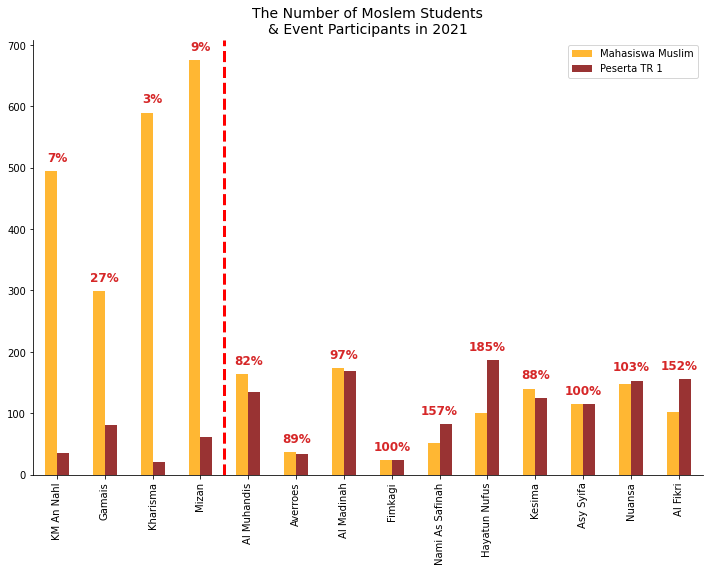

In [8]:
# Column chart of the number of participants and its comparison values
df_Peserta = df[['Nama', 'Jml_Muslim_21', 'Jml_Peserta_21']].set_index('Nama')
df_Peserta.rename(columns = {'Jml_Muslim_21':'Mahasiswa Muslim', 'Jml_Peserta_21':'Peserta TR 1'}, inplace = True)
fig = plt.figure(figsize=(12,8))
ax = plt.subplot2grid((1,1), (0,0))
df_Peserta.plot.bar(ax=ax, stacked=False, color=['orange', 'maroon'], alpha=0.8)
plt.xlabel(None)
plt.ylabel(None)
plt.title('The Number of Moslem Students\n& Event Participants in 2021', fontsize=14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Vertical Line
plt.axvline(x = 3.5, linestyle='dashed', linewidth=3, color = 'red')

# Showing Labels
label = round(df['Perbandingan'].astype(int), 2)

a = np.c_[df_Peserta['Mahasiswa Muslim'], df_Peserta['Peserta TR 1']]
maxi = np.max(a, axis=1)
l = ["{}%".format(label[i]) for i in range(0,14)]

for i in range(a.shape[0]): 
    plt.annotate(l[i], xy=(i,maxi[i]), xytext=(0,10), textcoords="offset points",
                 ha="center", color='tab:red', weight='bold', fontsize=12)

plt.show()

From the chart above, there is a red dashed line which serves as a boundary to distinguish which ones are having a great on its comparison and which ones are having a small one. Red numbers represent the comparison scores.

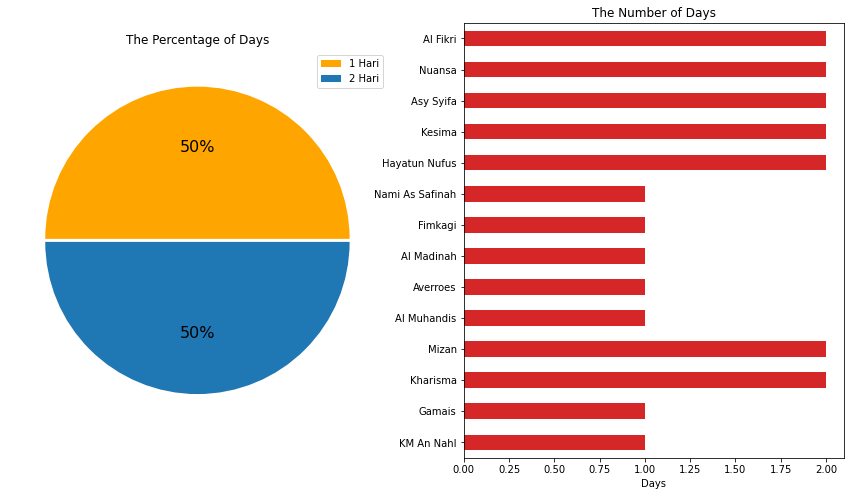

In [9]:
# Number and percentage of Total_Hari
fig = plt.figure(figsize=(15,8))
ax = plt.subplot2grid((1,2), (0,0))
ax1 = plt.subplot2grid((1,2), (0,1))

# Pie Chart
df_total_hari = pd.DataFrame({'Jumlah':df['Total_Hari'].astype(int).value_counts()})
df_total_hari = df_total_hari.reset_index()
df_total_hari['index'].replace([1, 2], ['1 Hari', '2 Hari'], inplace=True)
df_total_hari = df_total_hari.set_index('index')
df_total_hari.plot(kind='pie', ax=ax, y='Jumlah', colors=['orange', 'tab:blue'], labels=None,
                   explode=[0.01, 0.01], autopct='%0.0f%%', fontsize=16)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title('The Percentage of Days')

# Column Chart
df['Total_Hari'].plot.barh(x=df['Nama'], ax=ax1, color='tab:red')
ax1.set_title('The Number of Days')
ax1.set_xlabel('Days')
plt.yticks(ticks=range(0,14), labels=df['Nama'])

plt.show()

On the left side, we can see that for the number of days during the event, half of them were holding for 2 days and the rest of them were in a day. On the right side, we can see which organizations were holding the event in 2 days and which one in a day.

In this case, 2 out of 4 of the organizations who have the lowest comparison scores held the event for 2 days.

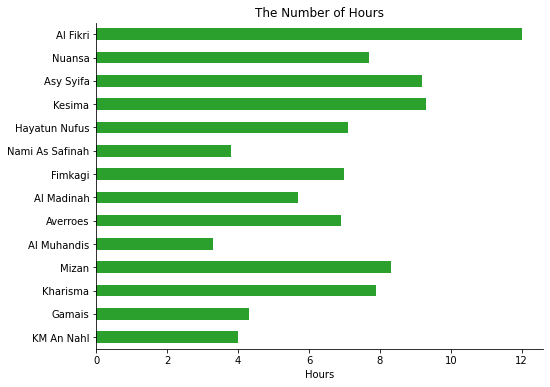

In [10]:
# Chart of Total_Durasi column
fig = plt.figure(figsize=(8,6))
ax = plt.subplot2grid((1,1), (0,0))

df['Total_Durasi'].plot.barh(ax=ax, color='tab:green')
plt.title('The Number of Hours')
plt.xlabel('Hours')
plt.ylabel(None)
plt.yticks(ticks=range(0,14), labels=df['Nama'])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Al Fikri becomes the organization that held the event with the longest duration for 12 hours compared to the other. If we look back to the number of days during the event, Al Fikri were held the event for 2 days.

Other than Al Fikri, Al Muhandis has the shortest score for duration compared to the other for not more than 4 hours in a day.

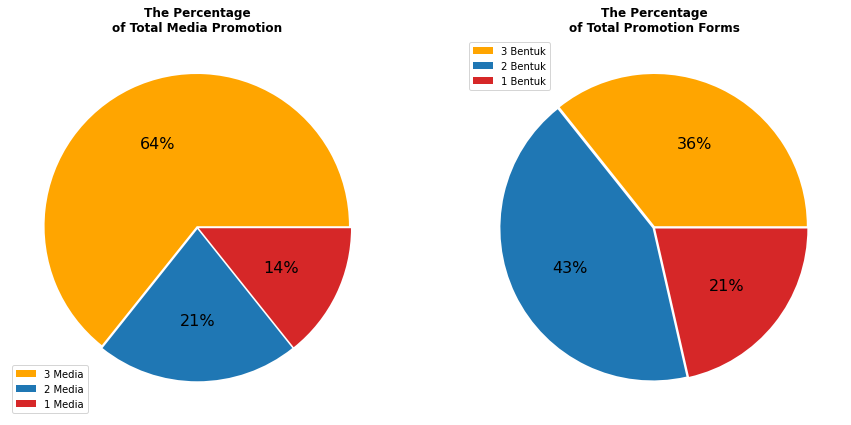

In [11]:
# Numbers of Jml_Media_Branding & Jml_Bentuk_Branding
fig = plt.figure(figsize=(15,8))
ax = plt.subplot2grid((1,2), (0,0))
ax1 = plt.subplot2grid((1,2), (0,1))

# Pie Chart 1
df_media = pd.DataFrame({'Jumlah':df['Jml_Media_Branding'].astype(int).value_counts()})
df_media = df_media.reset_index()
df_media['index'].replace([1, 2, 3], ['1 Media', '2 Media', '3 Media'], inplace=True)
df_media = df_media.set_index('index')
df_media.plot(kind='pie', ax=ax, y='Jumlah', colors=['orange', 'tab:blue', 'tab:red'], labels=None,
                   explode=[0.01, 0.01, 0.01], autopct='%0.0f%%', fontsize=16)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title('The Percentage\nof Total Media Promotion', weight='bold')

# Pie Chart 2
df_bentuk = pd.DataFrame({'Jumlah':df['Jml_Bentuk_Branding'].astype(int).value_counts()})
df_bentuk = df_bentuk.reset_index()
df_bentuk['index'].replace([1, 2, 3], ['1 Bentuk', '2 Bentuk', '3 Bentuk'], inplace=True)
df_bentuk = df_bentuk.set_index('index')
df_bentuk = df_bentuk.reindex(['3 Bentuk', '2 Bentuk', '1 Bentuk'])
df_bentuk.plot(kind='pie', ax=ax1, y='Jumlah', colors=['orange', 'tab:blue', 'tab:red'], labels=None,
                   explode=[0.01, 0.01, 0.01], autopct='%0.0f%%', fontsize=16)
ax1.set_ylabel(None)
ax1.set_xlabel(None)
ax1.set_title('The Percentage\nof Total Promotion Forms', weight='bold')

plt.show()

Some organizations were already maximized the promotion from any media. It can be seen that 64% of them were having 3 media for the promotion. Nevertheless, only 43% of the total organizations who did full of 3 forms in promotion, including pamphlet, videos, and socialization (*mouth to mouth*).

In [12]:
# Showing correlation value between comparison value variable and other variables
df_Komponen_Branding = df[['Perbandingan', 'Branding_Alasan_Penting', 'Branding_Manfaat_Materi',
       'Branding_Jam_Posting', 'Branding_Tujuan_Manfaat', 'Branding_Sebar_Konten']]

df_Lainnya = df[['Perbandingan', 'Total_Hari','Total_Durasi', 'Total_Materi',
                 'Tempat', 'Jml_Media_Branding', 'Jml_Bentuk_Branding']]

print('Korelasi Dengan Komponen Branding :')
print('=================================')
Komponen_Branding_Matrix = df_Komponen_Branding.corr()
print(Komponen_Branding_Matrix['Perbandingan'].sort_values(ascending = False))

print('\nKorelasi Dengan Lainnya :')
print('=================================')
Lainnya_Matrix = df_Lainnya.corr()
print(Lainnya_Matrix['Perbandingan'].sort_values(ascending = False))

Korelasi Dengan Komponen Branding :
Perbandingan               1.000000
Branding_Jam_Posting       0.161584
Branding_Sebar_Konten     -0.060368
Branding_Tujuan_Manfaat   -0.061763
Branding_Alasan_Penting   -0.278763
Branding_Manfaat_Materi   -0.278763
Name: Perbandingan, dtype: float64

Korelasi Dengan Lainnya :
Perbandingan           1.000000
Jml_Media_Branding     0.379506
Total_Durasi           0.207917
Total_Materi           0.116918
Total_Hari             0.105956
Tempat                 0.080748
Jml_Bentuk_Branding   -0.017256
Name: Perbandingan, dtype: float64


Branding_Jam_Posting and Jumlah_Media_Branding have the highest correlation with Perbandingan as dependent variable. The larger the value of Branding_Jam_Posting or Jumlah_Media_Branding have, the greater Perbandingan will be. In this case, Branding_Jam_Posting is a categorical variable which consists only 2 values, 1 as True and 0 as False.

In [13]:
# Finding the most frequently observed variable within categorical one.

local_dict = {}

for column in df.columns[10:-1]:
    local_dict[column] = (df[column].values == 1).sum()

Variabel_Sering_Dilakukan = dict(sorted(local_dict.items(), key=lambda item: item[1], reverse=True))

values1 = list(Variabel_Sering_Dilakukan.values())
labels1 = list(Variabel_Sering_Dilakukan.keys())

# Creating subplots
fig = make_subplots(rows=1, cols=1, specs=[[{'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels1, values=values1, name='Variabel Yang Paling Sering Dilakukan'), 1, 1)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

print('The most frequently observed variable :')
print('================================================================================')
fig.show()

The most frequently observed variable :


Here we can see that Branding_Tujuan_Manfaat is the most frequent oberved variable followed by Branding_Alasan_Penting and Branding_Manfaat_Materi. Whereas, Branding_Sebar_Konten becomes the least one, followed by Branding_Jam_Posting.

It means that most of the organizations were rarely observed who and how many committees were participating in promoting the event. Then, most of them were also rarely observed when and at what time they used to promote the event.

Text(0, 0.5, 'Nilai Standarisasi')

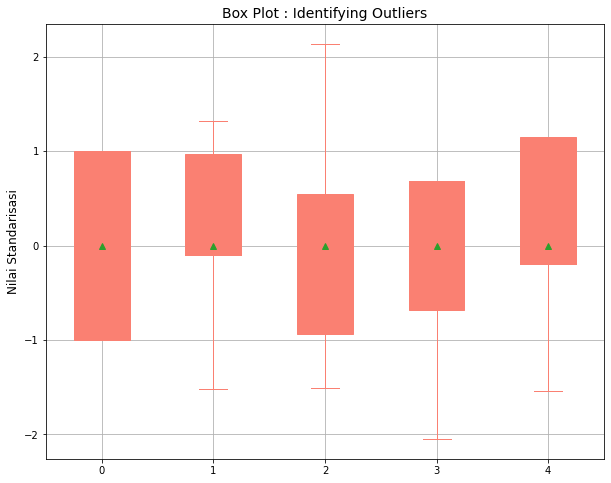

In [14]:
# Identifying outliers with box plot for numerical one
df_num_scaled = StandardScaler().fit_transform(df[['Total_Hari', 'Total_Materi', 'Total_Durasi',
                                                   'Jml_Media_Branding', 'Jml_Bentuk_Branding']])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
ax = pd.DataFrame(df_num_scaled).boxplot(notch=False, vert=True, patch_artist=True, showbox=True,
                         showmeans=True, color='salmon')
ax.set_title('Box Plot : Identifying Outliers', fontsize=14)
ax.yaxis.grid(True)
ax.set_ylabel('Nilai Standarisasi', fontsize=12)

We can clearly see that there is no outlier within the numerical columns (consist of Total_Hari, Total_Materi, Total_Durasi, Jml_Media_Branding, Jml_Bentuk_Branding).

### **Modelling & Evaluation : K-Prototypes Clustering**

The first model I used in this project is K-Prototypes Clustering. The aim of this model is to find the fit cluster of each organization who held the islamic event from 11 variables that already mentioned before. In this case, Perbandingan will be the dependent one.

The reason why I used this model is because the dataset has 2 types of data, numerical and categorical, as its independent variable. Whereas, the dependent one was in the type of numerical and didn't have any labeled one. Therefore, Based on what I've learned, K-Prototypes would be fit on this model for clustering.

In [20]:
X.columns

Index(['Total_Durasi', 'Total_Hari', 'Total_Materi', 'Jml_Media_Branding',
       'Jml_Bentuk_Branding', 'Branding_Sebar_Konten',
       'Branding_Alasan_Penting', 'Branding_Manfaat_Materi',
       'Branding_Tujuan_Manfaat', 'Branding_Jam_Posting', 'Tempat'],
      dtype='object')

In [21]:
# Defining variables
X = df.drop(columns=['Nama', 'Ket', 'Jml_Muslim_21', 'Jml_Peserta_21', 'Perbandingan'])
y = df['Perbandingan']

# DataFrame to an array
smart_array = X.values

# Index of categorical columns
categorical_index = list(range(5, 11))

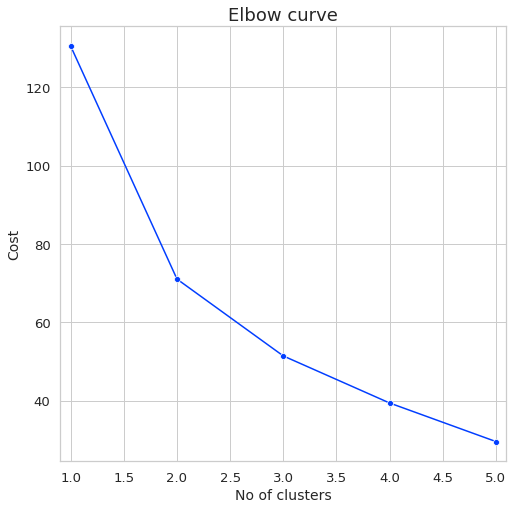

In [44]:
# Function for plotting elbow curve
def plot_elbow_curve(start, end, data):
    no_of_clusters = list(range(start, end+1))
    cost_values = []
    
    for k in no_of_clusters:
        test_model = KPrototypes(n_clusters=k, init='Cao', random_state=42, n_jobs=-1)
        test_model.fit_predict(data, categorical=categorical_index)
        cost_values.append(test_model.cost_)
        
    sns.set_theme(style="whitegrid", palette="bright", font_scale=1.2)
    
    plt.figure(figsize=(8, 8))
    ax = sns.lineplot(x=no_of_clusters, y=cost_values, marker="o", dashes=False)
    ax.set_title('Elbow curve', fontsize=18)
    ax.set_xlabel('No of clusters', fontsize=14)
    ax.set_ylabel('Cost', fontsize=14)
    ax.set(xlim=(start-0.1, end+0.1))
    plt.plot();
    
# Plotting elbow curve for k=1 to k=10
plot_elbow_curve(1,5, smart_array)

We can see that there is an indentation in k=2, therefore I would 2 as the number of clusters.

In [28]:
# Model of 2 clusters
model_2 = KPrototypes(n_clusters=2, init='Cao', random_state=42, n_jobs=-1)
print(model_2.fit_predict(smart_array, categorical=categorical_index))
print('Cost : %s' %model_2.cost_)

[1 1 0 0 1 0 1 0 1 0 0 0 0 0]
Cost : 71.01156470129428


In [29]:
pd.set_option('max_rows',None)
df['labels2'] = model_2.labels_
df.groupby('labels2').agg(['median' ,'mean']).T

labels2                                  0           1
Jml_Muslim_21           median  115.000000  174.000000
                        mean    214.555556  236.600000
Jml_Peserta_21          median  115.000000   82.000000
                        mean     96.888889  100.400000
Perbandingan            median  100.000000   82.317073
                        mean     92.406173   74.262228
Total_Durasi            median    7.900000    4.000000
                        mean      8.377778    4.220000
Total_Hari              median    2.000000    1.000000
                        mean      1.777778    1.000000
Total_Materi            median    3.000000    2.000000
                        mean      3.222222    2.800000
Jml_Media_Branding      median    3.000000    3.000000
                        mean      2.555556    2.400000
Jml_Bentuk_Branding     median    2.000000    2.000000
                        mean      2.222222    2.000000
Branding_Sebar_Konten   median    1.000000    0.000000
                        mean      0.555556    0.200000
Branding_Alasan_Penting median    1.000000    1.000000
                        mean      0.777778    0.800000
Branding_Manfaat_Materi median    1.000000    1.000000
                        mean      0.777778    0.800000
Branding_Tujuan_Manfaat median    1.000000    1.000000
                        mean      0.777778    1.000000
Branding_Jam_Posting    median    1.000000    1.000000
                        mean      0.666667    0.600000
Tempat                  median    0.000000    0.000000
                        mean      0.222222    0.200000

In [30]:
df[['Nama', 'Ket', 'Perbandingan', 'labels2']]

,Nama,Ket,Perbandingan,labels2
0,KM An Nahl,LDF,7.085020,1
1,Gamais,LDF,27.090301,1
2,Kharisma,LDF,3.389831,0
3,Mizan,LDF,9.037037,0
4,Al Muhandis,LDJ,82.317073,1
5,Averroes,LDJ,89.189189,0
6,Al Madinah,LDJ,97.126437,1
7,Fimkagi,LDJ,100.000000,0
8,Nami As Safinah,LDJ,157.692308,1
9,Hayatun Nufus,LDJ,185.148515,0


### **Modelling & Evaluation : Logistic Regression Test**

The second model I used in this project is Logistic Regression Test. The aim of this model is to find the most important features in determining the clusters so that the result itself could be considered by those organizations who want to held the Islamic event.

The reason why I used this model is because it is one of the simplest way in identifying the most important features. Besides, the dependent variable that used in this case is a dummy (categorical) variable as the result of clustering.

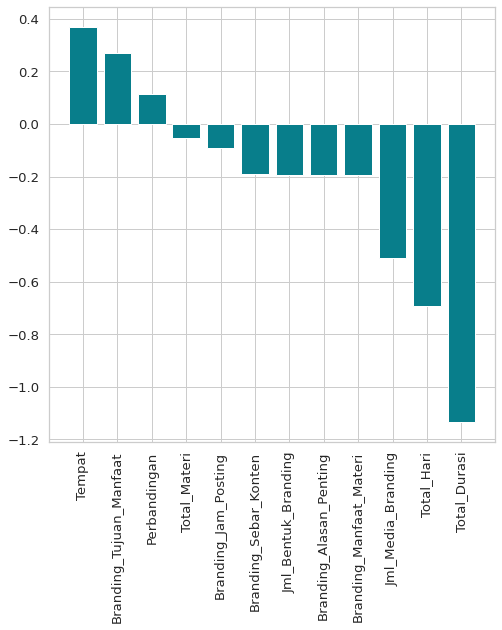

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Nama', 'Ket', 'Jml_Muslim_21', 'Jml_Peserta_21', 'labels2'])
y = df['labels2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

# Plotting the result
fig = plt.figure(figsize=(8,8))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.xticks(rotation='vertical')
plt.show()

### **Conclusion**

1.   From the first model in clustering result, it can be seen that cluster 0 has a greater mean comparison score between cluster 1. In this case, the greater the score is, the more effective the event would be. There are 9 organizations that classified to cluster 0.
2.   From the second model in Logistic Regression test result, Tempat (the place that used to held the event) is the most important feature in determining the clusters, followed by Braning_Tujuan_Manfaat and Perbandingan.

